In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("iris.csv")
print(np.array(data.target))

data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = data.drop(columns="target")
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)
print(X_train.shape)
X_test.shape

(112, 4)


(38, 4)

In [4]:
print(X.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=4)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
decision_tree.score(X_test, y_test)

0.9736842105263158

[Text(0.4, 0.9, 'petal length (cm) <= 2.6\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Versicolor'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.65\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Versicolor'),
 Text(0.2, 0.5, 'petal length (cm) <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]\nclass = Virginica'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Virginica'),
 Text(0.3, 0.3, 'sepal length (cm) <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = Versicolor'),
 Text(0.2, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Versicolor'),
 Text(0.8, 0.5, 'petal length (cm) <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = Versicolor'),
 Text(0.7, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Versic

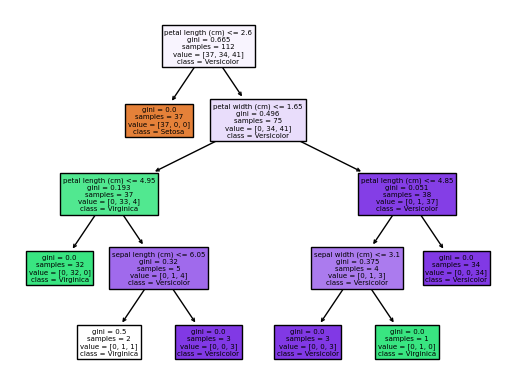

In [ ]:
plot_tree(
    decision_tree,
    feature_names=X.columns.to_list(),
    class_names=["Setosa", "Virginica", "Versicolor"],
    filled=True,
)

# fit

<br>

In [ ]:
dt = make_pipeline(
    KNNImputer(), SelectKBest(), StandardScaler(), DecisionTreeClassifier()
)  # StandardScaler().fit_transform(X_train, y_train) -> DecisionTreeClassifier().fit(X_train, y_train)

params = {
    "decisiontreeclassifier__max_depth": [1, 2, 3, 4],
    "decisiontreeclassifier__criterion": ["gini", "entropy"],
    "selectkbest__k": [1, 2, 3, 4],
}

grid = GridSearchCV(dt, param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('selectkbest', SelectKBest()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [1, 2, 3, 4],
                         'selectkbest__k': [1, 2, 3, 4]},
             verbose=1)

In [9]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016849,0.002383,0.006506,0.001161,gini,1,1,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
1,0.007749,0.000389,0.003003,0.000007,gini,1,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
2,0.011836,0.004666,0.005199,0.002036,gini,1,3,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
3,0.027970,0.010895,0.021761,0.021161,gini,1,4,"{'decisiontreeclassifier__criterion': 'gini', ...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,25
4,0.023053,0.006035,0.008323,0.004497,gini,2,1,"{'decisiontreeclassifier__criterion': 'gini', ...",1.000000,0.826087,0.863636,0.954545,0.909091,0.910672,0.062087,13
5,0.026571,0.007429,0.010776,0.005812,gini,2,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
6,0.013410,0.003207,0.005477,0.001247,gini,2,3,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
7,0.009687,0.001394,0.004197,0.001945,gini,2,4,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.826087,0.863636,1.000000,0.818182,0.892885,0.072693,19
8,0.010297,0.001483,0.003790,0.000962,gini,3,1,"{'decisiontreeclassifier__criterion': 'gini', ...",1.000000,0.826087,0.863636,0.954545,0.909091,0.910672,0.062087,13
9,0.011966,0.003128,0.004400,0.001358,gini,3,2,"{'decisiontreeclassifier__criterion': 'gini', ...",0.956522,0.956522,0.863636,1.000000,0.818182,0.918972,0.067240,7


In [10]:
print(grid.best_params_)
tree = grid.best_estimator_

{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'selectkbest__k': 4}


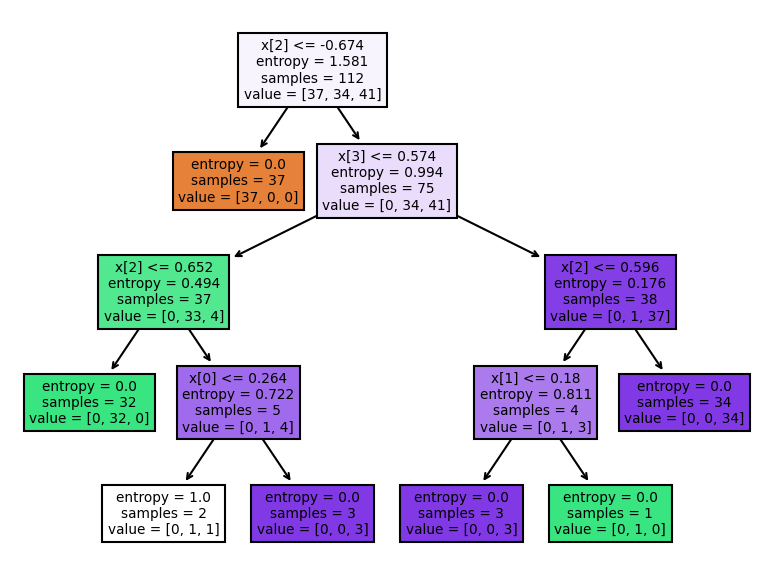

In [ ]:
plt.figure(dpi=150)
plot_tree(tree[3], filled=True)
plt.savefig("dt.png")

In [ ]:
y_pred = dt.predict(
    X_test
)  # StandardScaler().transform(X_test) -> DecisionTreeClassifier().predict(X_test)
y_pred

NotFittedError: This KNNImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
accuracy_score(y_test, y_pred)

0.9736842105263158